In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-dataset/covtype.csv


# IMPORT MODULES

In [3]:
import pandas as pd
import numpy as np
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# READ THE DATASET

read the data

In [5]:
df = pd.read_csv('../input/forest-cover-type-dataset/covtype.csv')

**number of data samples and number of features including goal feature**

In [6]:
df.shape

(581012, 55)

**select only 1000 sample**

In [7]:
data_subset = df.head(1000)

In [ ]:
data_subset.info()

In [9]:
data_subset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000
mean,2867.562000,141.844000,11.262000,236.588000,30.960000,3351.210000,218.274000,225.41300,139.768000,3184.821000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002000,0.003000,2.341000
std,173.698265,108.431135,6.022759,189.964572,37.223917,1678.140477,20.803984,14.61561,29.328763,1746.286039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044699,0.054717,1.346303
min,2486.000000,0.000000,1.000000,0.000000,-45.000000,67.000000,115.000000,141.00000,28.000000,120.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
25%,2739.000000,56.000000,7.000000,85.000000,4.000000,1826.750000,207.750000,217.00000,121.000000,1831.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000
50%,2900.000000,108.000000,10.000000,201.000000,20.000000,3470.000000,222.000000,227.00000,139.000000,2720.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000
75%,2985.000000,228.000000,14.000000,342.000000,46.000000,4779.250000,232.000000,235.00000,159.000000,4754.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000
max,3267.000000,359.000000,40.000000,997.000000,245.000000,6890.000000,254.000000,254.00000,240.000000,6853.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,5.000000


**check for any null values**

In [10]:
data_subset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


**check for unique values**

In [ ]:
data_subset.apply(lambda x: len(x.unique()))

checking count of goal feature

In [12]:
data_subset['Cover_Type'].value_counts()

2    585
1    226
5    189
Name: Cover_Type, dtype: int64

# EXPLORATORY DATA ANALYSIS

boxplot between goal feature and Aspect(feature)

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

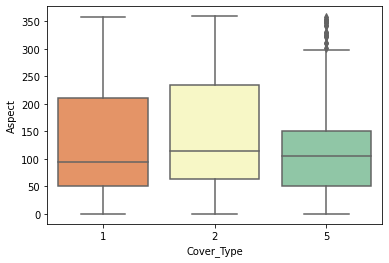

In [11]:
sns.boxplot(x = 'Cover_Type' , y = 'Aspect' , data = data_subset , palette = 'Spectral')

excluding the goal feature

In [13]:
X = data_subset.drop(['Cover_Type'] , axis = 1)

In [15]:
y = data_subset['Cover_Type']

In [16]:
X.shape

(1000, 54)

In [17]:
y.shape

(1000,)

# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

## RANDOM FOREST CLASSIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

**adding hyperparameters & using grid search for the best parameters**

In [21]:
# Define the hyperparameters
hyperparameters = {
    'n_estimators': [50, 100, 200,300,400,500,600],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7592552688167052


In [22]:
gs_best_para = grid_search.best_params_

In [23]:
rf = RandomForestClassifier(**gs_best_para)

# Fit the model to your data
rf.fit(X_train, y_train)

# Evaluate the model on your test data
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8033333333333333


In [25]:
from sklearn.metrics import classification_report

In [26]:
y_pred = rf.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.51      0.62        68
           2       0.79      0.91      0.85       171
           5       0.86      0.82      0.84        61

    accuracy                           0.80       300
   macro avg       0.81      0.75      0.77       300
weighted avg       0.80      0.80      0.79       300



In [28]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")

Confusion Matrix:
[35 31  2]
[  9 156   6]
[ 1 10 50]


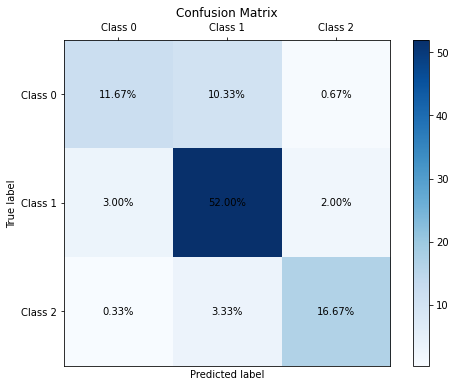

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the total number of instances
total = np.sum(confusion_mat)

# Calculate the percentage values
percentages = confusion_mat / total * 100

# Get the class labels
class_names = ['Class {}'.format(i) for i in range(confusion_mat.shape[0])]

# Create a subplot with the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(percentages, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.set_xlim([-0.5, len(class_names)-0.5])
ax.set_ylim([len(class_names)-0.5, -0.5])

# Add percentage values to the confusion matrix
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        text = ax.text(j, i, '{:.2f}%'.format(percentages[i, j]), ha="center", va="center", color="black")

# Add a color bar
fig.colorbar(ax.imshow(percentages, cmap='Blues'))

# Show the plot
plt.show()

In [30]:
# Define GA hyperparameters
size = 100  # Population size
n_feat = len(X_train.columns)  # Number of features
n_parents = 50  # Number of parents to select
mutation_rate = 0.1  # Mutation rate
n_gen = 100  # Number of generations



# Function for initialization of population in GA
def initialization_of_population(size, n_feat):
    population = []                              
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)     
        chromosome[:int(0.3 * n_feat)] = False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

# Function for fitness evaluation in GA
def fitness_score(population):
    scores = []
    for chromosome in population:
        rf.fit(X_train.iloc[:, chromosome], y_train)         
        predictions =rf.predict(X_test.iloc[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds, :][::-1]) 

# Function for selection in GA
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

# Function for crossover in GA
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

# Function for mutation in GA
def mutation(pop_after_cross, mutation_rate, n_feat):   
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0, mutation_range):
            pos = randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

# Function for GA generations
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  # Print best score in each generation
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

# Run GA after hyperparameter optimization
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                                               X_train, X_test, y_train, y_test)

Best score in generation 1 : [0.8333333333333334]
Best score in generation 2 : [0.84]
Best score in generation 3 : [0.84]
Best score in generation 4 : [0.84]
Best score in generation 5 : [0.8466666666666667]
Best score in generation 6 : [0.84]
Best score in generation 7 : [0.8466666666666667]
Best score in generation 8 : [0.8466666666666667]
Best score in generation 9 : [0.8433333333333334]
Best score in generation 10 : [0.85]
Best score in generation 11 : [0.85]
Best score in generation 12 : [0.85]
Best score in generation 13 : [0.8533333333333334]
Best score in generation 14 : [0.85]
Best score in generation 15 : [0.8533333333333334]
Best score in generation 16 : [0.85]
Best score in generation 17 : [0.8566666666666667]
Best score in generation 18 : [0.8533333333333334]
Best score in generation 19 : [0.85]
Best score in generation 20 : [0.8466666666666667]
Best score in generation 21 : [0.8566666666666667]
Best score in generation 22 : [0.8466666666666667]
Best score in generation 23

In [31]:
print('Best result:')
print('Best chromosome:', best_chromo[0])
print('Best score:', max(best_score))

Best result:
Best chromosome: [ True  True  True  True False  True False  True False  True False False
 False False False False  True  True  True  True  True False  True  True
  True False False False  True  True  True  True False False  True False
 False  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True]
Best score: 0.87


In [43]:
selected_features_indices = [index for index, value in enumerate(best_chromo[0]) if value == True]
selected_features_names = data_subset.drop('Cover_Type', axis=1).columns[selected_features_indices]
print("Selected Features by GA:", selected_features_names)

Selected Features by GA: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type21', 'Soil_Type24', 'Soil_Type25',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],
      dtype='object')


In [44]:
features_selected_list = selected_features_names.values.tolist()

In [45]:
import numpy as np

# Assume that data_subset is a pandas DataFrame with 54 columns
# and features_selected_list is a list of feature names to select

# Create a boolean mask based on the feature names in features_selected_list
mask_of_selected_features = np.isin(data_subset.iloc[:,1:].columns, features_selected_list)

# Use the mask to select the columns of X
X_selected = data_subset.iloc[:, 1:].values[:, mask_of_selected_features]

In [50]:
X_selected = data_subset[features_selected_list]
print(X_selected)

     Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         2596      51      3                               258   
1         2590      56      2                               212   
2         2804     139      9                               268   
3         2785     155     18                               242   
4         2595      45      2                               153   
..         ...     ...    ...                               ...   
995       2982      10     18                                30   
996       3032     339     14                                95   
997       2896      72     16                               319   
998       2846     135      2                                 0   
999       2995      39     18                                 0   

     Horizontal_Distance_To_Roadways  Hillshade_Noon  \
0                                510             232   
1                                390             235   
2                          

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size = 0.30, random_state=42)

In [52]:
rf = RandomForestClassifier(**gs_best_para)

# Fit the model to your data
rf.fit(X_train, y_train)

# Evaluate the model on your test data
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8233333333333334


In [53]:
y_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.53      0.63        68
           2       0.80      0.94      0.86       171
           5       0.98      0.84      0.90        61

    accuracy                           0.82       300
   macro avg       0.85      0.77      0.80       300
weighted avg       0.83      0.82      0.82       300



In [55]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")

Confusion Matrix:
[36 31  1]
[ 11 160   0]
[ 0 10 51]


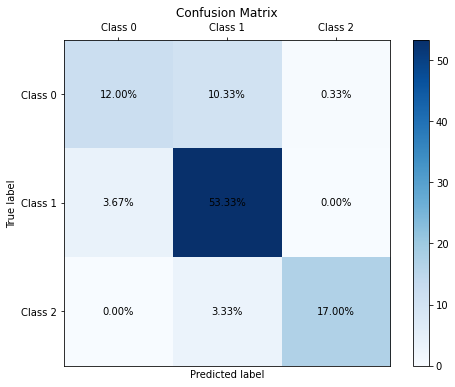

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the total number of instances
total = np.sum(confusion_mat)

# Calculate the percentage values
percentages = confusion_mat / total * 100

# Get the class labels
class_names = ['Class {}'.format(i) for i in range(confusion_mat.shape[0])]

# Create a subplot with the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(percentages, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.set_xlim([-0.5, len(class_names)-0.5])
ax.set_ylim([len(class_names)-0.5, -0.5])

# Add percentage values to the confusion matrix
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        text = ax.text(j, i, '{:.2f}%'.format(percentages[i, j]), ha="center", va="center", color="black")

# Add a color bar
fig.colorbar(ax.imshow(percentages, cmap='Blues'))

# Show the plot
plt.show()